# Cat and Dog Image Classifier
This is my solution for the Cat and Dogs Image Classifier project from FreeCodeCamp. Instructions for this project can be found [here](https://www.freecodecamp.org/learn/machine-learning-with-python/machine-learning-with-python-projects/cat-and-dog-image-classifier).

## Introduction
The course lectures explain how to solve it quite well. You can just follow along and complete it without the need for additional learning resources.

In [ ]:
try:
  # This command only in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
# Get project files
!wget https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip

!unzip cats_and_dogs.zip
!rm -rf __MACOSX

PATH = 'cats_and_dogs'

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')

# Get number of files in each directory. The train and validation directories
# each have the subdirecories "dogs" and "catslen( os.listdir(test_dir) )".
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))

# Variables for pre-processing and training.
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [ ]:
# 3
train_image_generator = ImageDataGenerator( rescale=1./255 )
validation_image_generator = ImageDataGenerator( rescale=1./255 )
test_image_generator = ImageDataGenerator( rescale=1./255 )

train_data_gen = train_image_generator.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=batch_size,
    class_mode='binary',
)
val_data_gen = validation_image_generator.flow_from_directory(
    validation_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=batch_size,
    class_mode='binary',
)
test_data_gen = test_image_generator.flow_from_directory(
    PATH,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=1,
    classes=['test'],
    shuffle=False,
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 50 images belonging to 1 classes.


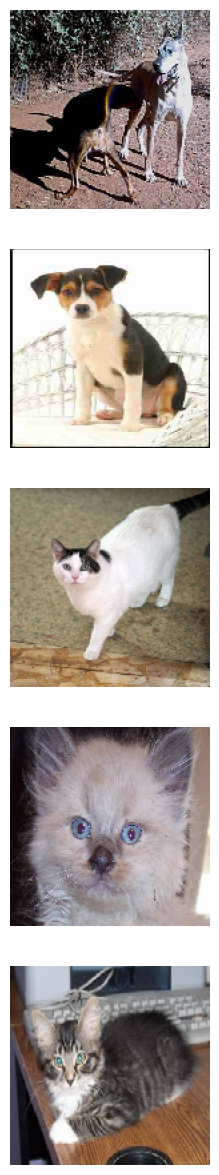

In [ ]:
# 4
def plotImages(images_arr, probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax in zip( images_arr, probabilities, axes):
          ax.imshow(img)
          ax.axis('off')
          if probability > 0.5:
              ax.set_title("%.2f" % (probability*100) + "% dog")
          else:
              ax.set_title("%.2f" % ((1-probability)*100) + "% cat")
    plt.show()

sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:5])


In [ ]:
# 5
train_image_generator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.8, 1.3],
    fill_mode='nearest',
)


Found 2000 images belonging to 2 classes.


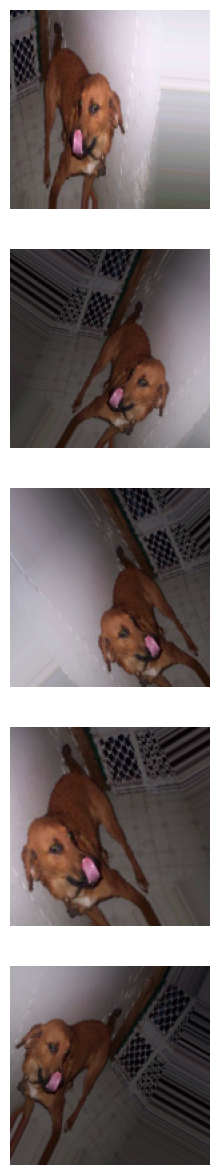

In [ ]:
# 6
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

plotImages(augmented_images)

In [ ]:
# 7
model = Sequential()

# add convolution layers
model.add( Conv2D( 32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3) ) )
model.add( MaxPooling2D((2, 2)) )

model.add( Conv2D( 64, (3, 3), activation='relu' ) )
model.add( MaxPooling2D((2, 2)) )

model.add( Conv2D( 128, (3, 3), activation='relu' ) )
model.add( MaxPooling2D((2, 2)) )

# Add dense layers
model.add( Flatten() )
model.add( Dense(512, activation='relu') )
model.add( Dropout(0.5) )
model.add( Dense(1, activation='sigmoid') )

# Compile the model
model.compile( optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'] )

model.summary()


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 17, 17, 128)     

In [ ]:
# 8
history = model.fit(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size,
)

Epoch 1/15
15/15 [==============================] - 24s 1s/step - loss: 0.9752 - accuracy: 0.4909 - val_loss: 0.6952 - val_accuracy: 0.4978
Epoch 2/15
15/15 [==============================] - 21s 1s/step - loss: 0.6924 - accuracy: 0.5011 - val_loss: 0.6890 - val_accuracy: 0.5078
Epoch 3/15
15/15 [==============================] - 20s 1s/step - loss: 0.6917 - accuracy: 0.5139 - val_loss: 0.6827 - val_accuracy: 0.5290
Epoch 4/15
15/15 [==============================] - 19s 1s/step - loss: 0.6915 - accuracy: 0.5278 - val_loss: 0.6873 - val_accuracy: 0.5145
Epoch 5/15
15/15 [==============================] - 20s 1s/step - loss: 0.6854 - accuracy: 0.5358 - val_loss: 0.6647 - val_accuracy: 0.5346
Epoch 6/15
15/15 [==============================] - 19s 1s/step - loss: 0.6774 - accuracy: 0.5668 - val_loss: 0.6688 - val_accuracy: 0.5848
Epoch 7/15
15/15 [==============================] - 20s 1s/step - loss: 0.6738 - accuracy: 0.5688 - val_loss: 0.6497 - val_accuracy: 0.5525
Epoch 8/15
15/15 [==

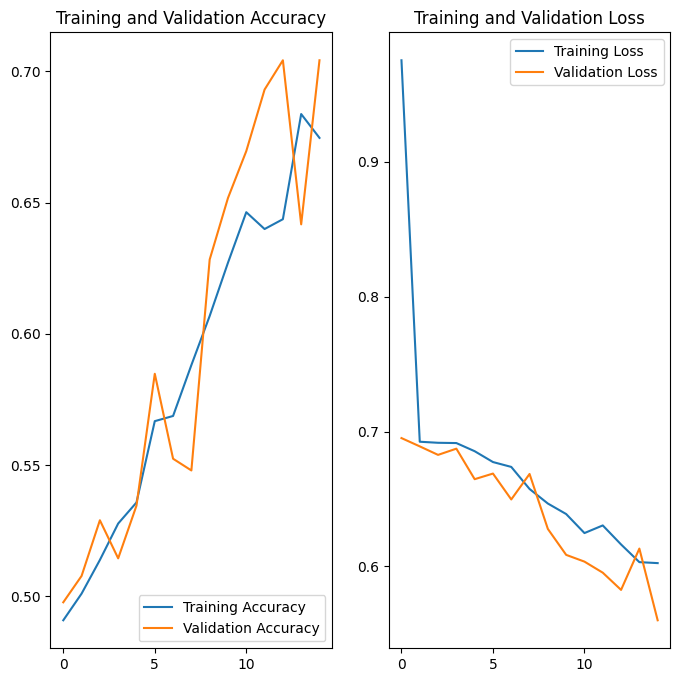

In [ ]:
# 9
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
probabilities = model.predict(test_data_gen)
probabilities.flatten()

50/50 [==============================] - 0s 4ms/step


array([0.5032384 , 0.4139101 , 0.17953713, 0.5255429 , 0.44127524,
       0.4982206 , 0.69945645, 0.3012213 , 0.5844535 , 0.9522235 ,
       0.45622712, 0.531176  , 0.32177195, 0.29481608, 0.4386916 ,
       0.611254  , 0.45025215, 0.72245294, 0.7212618 , 0.5909459 ,
       0.15887144, 0.43560633, 0.2782173 , 0.5483587 , 0.6348432 ,
       0.3857629 , 0.97925764, 0.38730833, 0.37871975, 0.5648836 ,
       0.2905536 , 0.27934012, 0.6163347 , 0.99965346, 0.34904087,
       0.60456717, 0.9884946 , 0.67303824, 0.29727697, 0.3683745 ,
       0.4076395 , 0.5091131 , 0.8953919 , 0.5390634 , 0.3219615 ,
       0.2958708 , 0.45940104, 0.34662315, 0.21002614, 0.3086969 ],
      dtype=float32)

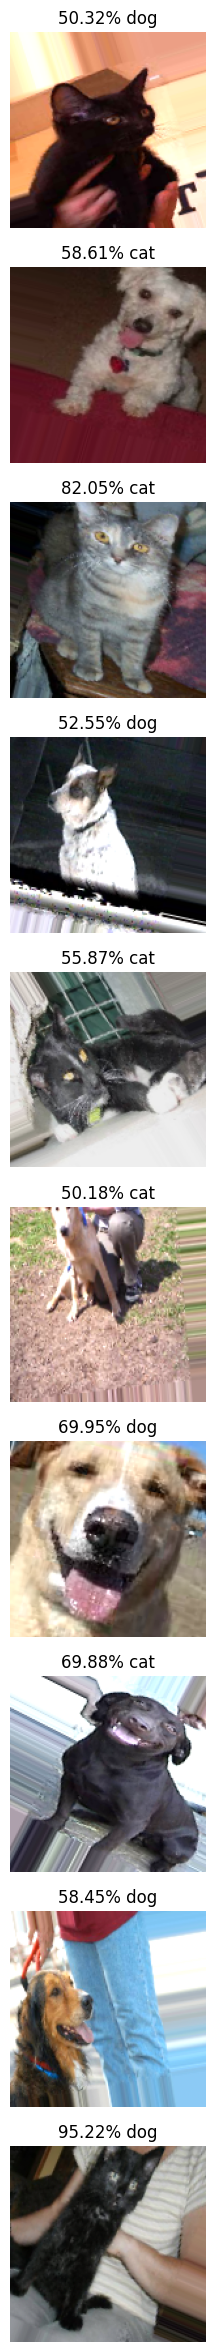

In [ ]:
sample_training_images, _ = next(train_data_gen)
plotImages( sample_training_images[:10], probabilities=probabilities )

In [ ]:
# 11
answers =  [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
            1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
            1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
            1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
            0, 0, 0, 0, 0, 0]

correct = 0

for probability, answer in zip(probabilities, answers):
  if np.round(probability) == answer:
    correct +=1

percentage_identified = (correct / len(answers)) * 100

passed_challenge = percentage_identified >= 63

print(f"Your model correctly identified {round(percentage_identified, 2)}% of the images of cats and dogs.")

if passed_challenge:
  print("You passed the challenge!")
else:
  print("You haven't passed yet. Your model should identify at least 63% of the images. Keep trying. You will get it!")

Your model correctly identified 80.0% of the images of cats and dogs.
You passed the challenge!
